In [3]:
%matplotlib inline
from __future__ import print_function, division
path = "data/baidu/"
#path = "data/state/sample/"
import utils; reload(utils)
from utils import *
from IPython.display import FileLink

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 760 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [4]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [3]:
tokens = ['0','1','2', '3','4','5','6','7','8','9','(',')', '+', '-', '*', 'N']

In [4]:
test_imgs = load_array(path+'test_imgs.dat')

In [5]:
def get_model():
    return Sequential([
            BatchNormalization(axis=1, input_shape=(1,30,90)),
            #Lambda(norm_input, input_shape=(1,30,90), output_shape=(1,30,90)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),

            Flatten(),
            BatchNormalization(),

            
            Dense(70, activation='relu'),
            BatchNormalization(),
            Reshape((7, 10)),
            
            GRU(512, return_sequences=True),
        
            TimeDistributed(Dense(16, activation='softmax'))
        ])

In [6]:
final_models = []
for i in range(6):
    m = get_model()
    m.load_weights('best_2.wgt'+str(i))
    final_models.append(m)

In [7]:
exps = []
test_val = test_imgs
all_preds=[]
avg_preds=[]
for i in xrange(0, len(test_val), 1000):
    if i%10000==0:
        print(i/10000)
    ridx = i + 1000
    if ridx > len(test_val):
        ridx = len(test_val)
    all_preds = np.stack([m.predict(test_val[i:ridx], batch_size=256) for m in final_models])
    avg_preds = all_preds.mean(axis=0)
    preds = np.array([[np.argmax(i) for i in p] for p in avg_preds])
    for idx in range(len(preds)):
        exp = ''.join([tokens[i].rstrip('N') for i in preds[idx]]) 
        r=0
        try:
            r=eval(exp)
        except SyntaxError:
            print(str(len(exps)) +'|'+ exp)
            #plot(test_val[len(exps)].reshape((30,90)))
        exps.append(exp+' '+str(r))


0.0
1.0
17416|7*(+)
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
95303|(+++)
10.0
102187|(+(*))
11.0
117422|2+(+9
12.0
13.0
14.0
142660|(*(5)
15.0
16.0
17.0
18.0
19.0


In [14]:
with open('results.txt', 'w') as the_file:
    for s in exps: the_file.write(s+'\n')

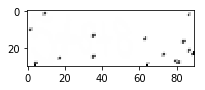

In [9]:
plot(test_imgs[102187].reshape((30,90)))

In [12]:
exps[-20:]

['0-5*1 -5',
 '5-(5+6) -6',
 '(0*2)*7 0',
 '2+(8-1) 9',
 '5*(7+6) 65',
 '9+(1*5) 14',
 '3-(0*7) 3',
 '7+7*4 35',
 '1*7+7 14',
 '(3*6)*4 72',
 '9-(3-3) 9',
 '(9-0)-6 3',
 '7*(5*6) 210',
 '(7-3)-5 -1',
 '2+(4+5) 11',
 '1-(8+5) -12',
 '6+6-5 7',
 '(0-8)-1 -9',
 '2*(8+4) 24',
 '(1+9)*3 30']

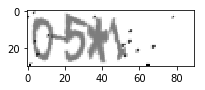

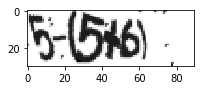

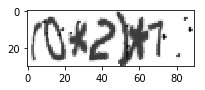

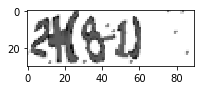

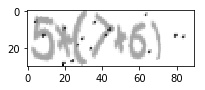

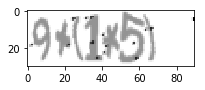

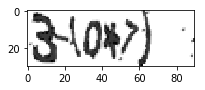

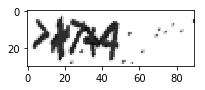

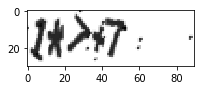

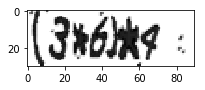

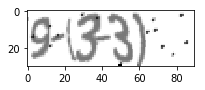

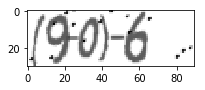

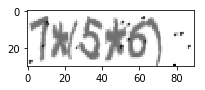

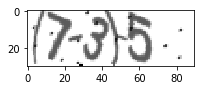

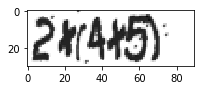

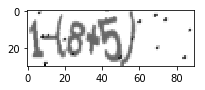

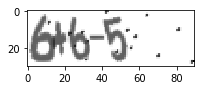

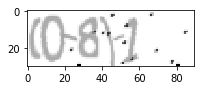

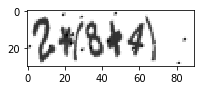

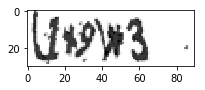

In [13]:
for img in test_imgs[-20:]:
    plot(img.reshape((30,90)))

In [ ]:
FileLink('results.txt')

In [16]:
%ls

baidu-Copy1.ipynb    best_1.wgt3  data/                   statefarm.ipynb
baidu-Copy2.ipynb    best_1.wgt4  emoji.ipynb             state_ft.ipynb
baidu.ipynb          best_1.wgt5  farm.ipynb              state.ipynb
baidu-m2.ipynb       best_2.wgt0  feature_learning.ipynb  utils.py*
baidu_predict.ipynb  best_2.wgt1  fish.ipynb              utils.pyc
best_1.wgt           best_2.wgt2  linear.ipynb            vgg16bn.py*
best_1.wgt0          best_2.wgt3  redux.ipynb             vgg16bn.pyc
best_1.wgt1          best_2.wgt4  results.txt             vgg16.py*
best_1.wgt2          best_2.wgt5  rnn.ipynb               vgg16.pyc


In [17]:
FileLink('results.txt')

/home/viiv/workspace/results.txt